In [7]:
import ast
import os.path

import numpy
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns
from toolsets.file_io import read_df, save_df
import toolsets.raw_data_scaffold as rds
import toolsets.T_rex as trx
import toolsets.spectra_operations as so
import toolsets.spectra_plotter as plotter
import toolsets.denoising_related_functions as drf
import re
import chemparse
from pubchempy import Compound, get_compounds
from toolsets.search import quick_search_values, quick_search_sorted, string_search, search_feature
import itertools
import toolsets.chem_utils as cu
from rdkit import Chem
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from molmass import Formula
master_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/Astral/'
fig_dir = master_dir
from rdkit.Chem.rdMolDescriptors import CalcMolFormula

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:

import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [9]:
def filter_alignment(alignment):
    a = alignment.copy()
    # a = a[a['Fill %']>0.5]
    a = a[a['MS/MS assigned']==True]
    a = a[['Metabolite name','Alignment ID','Average Rt(min)','Average Mz','Spectrum reference file name','MS1 isotopic spectrum','MS/MS spectrum']]
    a.rename(columns={'Average Mz': 'precursor_mz', 'MS/MS spectrum':'peak', 'MS1 isotopic spectrum':'ms1'}, inplace=True)
    peak  = []
    ms1 = []
    for index, row in a.iterrows():
        ms1.append(so.standardize_msdial((row['ms1'])))

        peak.append(so.standardize_msdial((row['peak'])))
    a['peak']=peak
    a['ms1']=ms1
    return a
from toolsets.library_search import identity_search_single
import scipy
import math

# lets do pos first

In [2]:
mega_mona_pos = read_df('/Users/fanzhoukong/Documents/GitHub/Libgen_data/curated_library/csv/pos_orbi_sorted.csv')

done read in df


In [2]:
master_dir

'/Users/fanzhoukong/Documents/GitHub/Libgen_data/Astral/'

In [4]:
formulas = []
for index, row in tqdm(mega_mona_pos.iterrows(), total = len(mega_mona_pos)):
    try:
        formulas.append(cu.everything_to_formula(row['SMILES']))
    except:
        formulas.append(np.NAN)

100%|██████████| 2028556/2028556 [06:02<00:00, 5602.65it/s]


In [4]:
from toolsets.file_io import readin_peak_list

In [5]:
expolaris_raw =readin_peak_list('/Users/fanzhoukong/Documents/GitHub/Libgen_data/Astral/Exploris/alignment/pos/Height_1_20244151614_posBA.txt', alighment=True)

In [10]:
expolaris_pos = filter_alignment(expolaris_raw)

In [11]:
expolaris_pos

,Metabolite name,Alignment ID,Average Rt(min),precursor_mz,Spectrum reference file name,ms1,peak
1,Unknown,1,1.448,60.05555,NIST001_MX806650_posBA_postRima0070,"[[60.05555, 501922.0], [61.0589, 36363.0], [62...","[[42.03376, 15356.0], [43.0178, 151846.0], [43..."
56,Urea,56,0.491,61.03959,PoolMSMS001_MX806650_posBA_Rima_IE02,"[[61.03958, 1446106.0], [62.04293, 0.0], [63.0...","[[41.3215, 2814.0], [42.03378, 43001.0], [44.0..."
102,w/o MS2:Ethanolamine,102,1.772,62.05997,PoolMSMS001_MX806650_posBA_Rima_IE01,"[[62.05997, 98763.0], [63.06332, 0.0], [64.066...","[[44.04945, 82294.0], [45.03361, 7294.0], [62...."
103,w/o MS2:Ethanolamine,103,1.729,62.06001,NIST001_MX806650_posBA_postRima0070,"[[62.05996, 470737.0], [63.06331, 0.0], [64.06...","[[42.03379, 3864.0], [43.66098, 2272.0], [44.0..."
150,Unknown,150,2.085,63.06317,PoolMSMS001_MX806650_posBA_Rima_IE03,"[[63.06316, 88541.0], [64.06651, 0.0], [65.069...","[[45.05265, 8787.0], [51.93818, 2544.0], [54.0..."
...,...,...,...,...,...,...,...
23063,w/o MS2:MGDG O-28:7_16:3,23063,3.080,887.59760,PoolMSMS001_MX806650_posBA_Rima_IE01,"[[887.5976, 12424.0], [888.60095, 0.0], [889.6...","[[129.0705, 3060.0], [232.70143, 3073.0], [286..."
23074,Unknown,23074,3.088,890.39844,PoolMSMS001_MX806650_posBA_Rima_IE01,"[[890.39844, 11459.0], [891.4018, 0.0], [892.4...","[[110.54848, 3304.0], [116.18746, 3083.0], [13..."
23087,w/o MS2:[Nle13]-Motillin,23087,3.036,894.14001,PoolMSMS001_MX806650_posBA_Rima_IE01,"[[894.14, 15079.0], [895.1434, 0.0], [896.1467...","[[98.34957, 3422.0], [98.38913, 3591.0], [166...."
23089,Unknown,23089,3.052,895.02991,PoolMSMS001_MX806650_posBA_Rima_IE01,"[[895.0299, 19578.0], [896.03326, 0.0], [897.0...","[[94.73903, 2875.0], [96.54868, 3091.0], [97.6..."


In [8]:
expolaris_pos=expolaris_pos.rename(columns={"precursor_mz": "PrecursorMZ", "peak": "spectrum"}, errors="raise")

In [11]:
exploaris_searched = pd.DataFrame()
label = 0
for index, row in tqdm(expolaris_pos.iterrows(), total = len(expolaris_pos)):
    searched = drf.denoising_search_astral(row, mega_mona_pos)
    # searched['inchikey']=[cu.everything_to_inchikey(x) for x in searched['SMILES']]
    # break
    searched['label']=index
    exploaris_searched = pd.concat([exploaris_searched, searched], ignore_index=True)

100%|██████████| 1889/1889 [03:08<00:00, 10.04it/s]


In [12]:
exp_top_hit_l1 = pd.DataFrame()#denoising search result
exp_top_hit_raw = pd.DataFrame()# classic entropy search result
for i in tqdm(exploaris_searched['label'].unique()):
    spec = string_search(exploaris_searched, 'label', i)
    spec.sort_values(by = 'entropy_raw', ascending= False, inplace=True)
    exp_top_hit_raw = pd.concat([exp_top_hit_raw, spec.iloc[0:1]], ignore_index=True)
    spec.sort_values(by = 'entropy_denoised', ascending= False, inplace=True)
    exp_top_hit_l1 = pd.concat([exp_top_hit_l1, spec.iloc[0:1]], ignore_index=True)

100%|██████████| 1487/1487 [00:01<00:00, 970.71it/s] 


In [14]:
exp_top_hit_raw[exp_top_hit_raw['entropy_raw']>0.75]

,msms_denoised,entropy_raw,entropy_denoised,label,lib_id,spectrum,Name,PrecursorMZ,Precursor_type,SMILES,Comments,processed_formulas,charge
10,"[[58.06512, 212947.0], [59.07293, 427542.0], [...",0.959814,0.994689,743,38.0,"[[58.06542, 100.0], [59.0732, 86.9], [76.07576...",TRIMETHYLAMINE N-OXIDE,76.07569,[M+H]+,O=N(C)(C)C,"""computed SMILES=O=N(C)(C)C"" ""computed InChI=I...",C3H9NO,1.0
22,"[[42.03378, 5864.0], [43.01785, 9180.0], [44.0...",0.789729,0.824925,1753,843.0,"[[53.0386, 1.6], [55.0542, 9.2], [56.0494, 73....",5-Aminopentanamide,100.07570,[M+H-NH3]+,NCCCCC(N)=O,NIST Mass Spectrometry Data Center,C5H9NO,1.0
26,"[[42.03382, 3049.0], [46.06506, 23688.0], [58....",0.762369,0.813482,1846,4340.0,"[[58.0649, 27.4], [72.0805, 15.7], [74.0962, 1...",Triethylamine,102.12770,[M+H]+,CCN(CC)CC,NIST Mass Spectrometry Data Center,C6H15N,1.0
27,"[[57.03367, 3427.0], [85.02855, 7937.0], [103....",0.859566,0.992677,1870,4632.0,"[[57.0332, 36.2], [85.0261, 4.2], [85.0281, 36...",Ethyl 2-[(2S)-oxiran-2-yl]acetate,103.03900,[M+H-C2H4]+,CCOC(=O)CC1CO1,NIST Mass Spectrometry Data Center,C4H6O3,1.0
29,"[[42.0338, 98454.0], [44.04951, 61446.0], [45....",0.754488,0.796592,1921,6500.0,"[[58.0648, 7.1], [59.0726, 1.8], [60.0805, 88....",Glycerophosphocholine,104.10700,[M+H-C3H7O5P]+,C[N+](C)(C)CCOP(=O)([O-])OCC(O)CO,NIST Mass Spectrometry Data Center,C5H13NO,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,"[[86.09644, 133900.0], [95.08577, 4998.0], [98...",0.845025,0.867252,22467,1426573.0,"[[71.0729, 6.5], [86.0962, 159.0], [98.984, 7....","1-(1Z-Octadecenyl)-2-(4Z,7Z,10Z,13Z,16Z,19Z-do...",818.60580,[M+H]+,CCC=CCC=CCC=CCC=CCC=CCC=CCCC(=O)OC(COC=CCCCCCC...,NIST Mass Spectrometry Data Center,C48H84NO7P,1.0
1427,"[[86.09644, 302553.0], [88.46697, 4030.0], [98...",0.871391,0.893440,22468,1426573.0,"[[71.0729, 6.5], [86.0962, 159.0], [98.984, 7....","1-(1Z-Octadecenyl)-2-(4Z,7Z,10Z,13Z,16Z,19Z-do...",818.60580,[M+H]+,CCC=CCC=CCC=CCC=CCC=CCC=CCCC(=O)OC(COC=CCCCCCC...,NIST Mass Spectrometry Data Center,C48H84NO7P,1.0
1445,"[[91.0545, 8225.0], [98.98408, 353202.0], [104...",0.760669,0.793323,22667,1444987.0,"[[71.0729, 4.1], [86.0964, 134.0], [87.0997, 8...",1-Docosahexaenoyl-2-stearoyl-sn-glycero-3-phos...,834.60070,[M+H]+,CCC=CCC=CCC=CCC=CCC=CCC=CCCC(=O)OCC(COP(=O)([O...,NIST Mass Spectrometry Data Center,C48H84NO8P,1.0
1446,"[[95.08525, 4851.0], [98.98414, 133890.0], [10...",0.783047,0.792032,22668,1444987.0,"[[71.0729, 4.1], [86.0964, 134.0], [87.0997, 8...",1-Docosahexaenoyl-2-stearoyl-sn-glycero-3-phos...,834.60070,[M+H]+,CCC=CCC=CCC=CCC=CCC=CCC=CCCC(=O)OCC(COP(=O)([O...,NIST Mass Spectrometry Data Center,C48H84NO8P,1.0


In [16]:
exp_top_hit_l1[exp_top_hit_l1['entropy_denoised']>0.75]

,msms_denoised,entropy_raw,entropy_denoised,label,lib_id,spectrum,Name,PrecursorMZ,Precursor_type,SMILES,Comments,processed_formulas,charge
10,"[[58.06512, 212947.0], [59.07293, 427542.0], [...",0.959814,0.994689,743,38.0,"[[58.06542, 100.0], [59.0732, 86.9], [76.07576...",TRIMETHYLAMINE N-OXIDE,76.07569,[M+H]+,O=N(C)(C)C,"""computed SMILES=O=N(C)(C)C"" ""computed InChI=I...",C3H9NO,1.0
11,"[[45.03346, 5689.0], [56.04934, 3990.0], [58.0...",0.734742,0.772990,744,39.0,"[[51.83394, 0.108826], [53.44569, 0.127399], [...",Trimethylamine N-oxide,76.07629,[M+H]+,O=N(C)(C)C,"""computed SMILES=O=N(C)(C)C"" ""computed InChI=I...",C3H9NO,1.0
12,"[[58.06512, 10492.0], [59.07279, 2647.0], [76....",0.696646,0.990799,746,38.0,"[[58.06542, 100.0], [59.0732, 86.9], [76.07576...",TRIMETHYLAMINE N-OXIDE,76.07569,[M+H]+,O=N(C)(C)C,"""computed SMILES=O=N(C)(C)C"" ""computed InChI=I...",C3H9NO,1.0
14,"[[69.06974, 3806.0], [86.06, 3161.0], [86.0963...",0.623362,0.847667,1169,98.0,"[[67.0542, 0.101997], [69.0698, 3.16092], [86....",Piperidine,86.09640,[M+H]+,C1CCNCC1,"""SMILES=C1CCNCC1"" ""cas=110-89-4"" ""chebi=18049""...",C5H11N,1.0
18,"[[42.03384, 7648.0], [53.03852, 30524.0], [65....",0.665308,0.775338,1504,288.0,"[[53.0388, 2.6], [65.0383, 12.9], [66.0463, 1....",4-Picoline,94.06510,[M+H]+,Cc1ccncc1,NIST Mass Spectrometry Data Center,C6H7N,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,"[[86.09644, 302553.0], [88.46697, 4030.0], [98...",0.871391,0.893440,22468,1426573.0,"[[71.0729, 6.5], [86.0962, 159.0], [98.984, 7....","1-(1Z-Octadecenyl)-2-(4Z,7Z,10Z,13Z,16Z,19Z-do...",818.60580,[M+H]+,CCC=CCC=CCC=CCC=CCC=CCC=CCCC(=O)OC(COC=CCCCCCC...,NIST Mass Spectrometry Data Center,C48H84NO7P,1.0
1445,"[[91.0545, 8225.0], [98.98408, 353202.0], [104...",0.760669,0.793323,22667,1444987.0,"[[71.0729, 4.1], [86.0964, 134.0], [87.0997, 8...",1-Docosahexaenoyl-2-stearoyl-sn-glycero-3-phos...,834.60070,[M+H]+,CCC=CCC=CCC=CCC=CCC=CCC=CCCC(=O)OCC(COP(=O)([O...,NIST Mass Spectrometry Data Center,C48H84NO8P,1.0
1446,"[[95.08525, 4851.0], [98.98414, 133890.0], [10...",0.783047,0.792032,22668,1444987.0,"[[71.0729, 4.1], [86.0964, 134.0], [87.0997, 8...",1-Docosahexaenoyl-2-stearoyl-sn-glycero-3-phos...,834.60070,[M+H]+,CCC=CCC=CCC=CCC=CCC=CCC=CCCC(=O)OCC(COP(=O)([O...,NIST Mass Spectrometry Data Center,C48H84NO8P,1.0
1447,"[[88.36983, 4017.0], [91.05412, 6273.0], [93.0...",0.751620,0.771408,22670,1444984.0,"[[71.0727, 5.8], [86.0959, 115.9], [98.9837, 8...",1-Stearoyl-2-docosahexaenoyl-sn-glycero-3-phos...,834.60070,[M+H]+,CCC=CCC=CCC=CCC=CCC=CCC=CCCC(=O)OC(COC(=O)CCCC...,NIST Mass Spectrometry Data Center,C48H84NO8P,1.0


In [ ]:
save_df(exp_top_hit_l1, os.path.join(master_dir, 'exp_top_hit_l1.csv'))
save_df(exp_top_hit_raw, os.path.join(master_dir, 'exp_top_hit_raw.csv'))

In [12]:
astral_raw =pd.read_csv('/Users/fanzhoukong/Documents/GitHub/Libgen_data/Astral/shentong_result.csv')
astral_pos = filter_alignment(astral_raw)
astral_pos=astral_pos.rename(columns={"precursor_mz": "PrecursorMZ", "peak": "spectrum"}, errors="raise")

In [13]:
astral_pos

,Metabolite name,Alignment ID,Average Rt(min),PrecursorMZ,Spectrum reference file name,ms1,spectrum
0,(-)-Pseudoephedrine,2466,0.650,166.12286,Rima0015_MX806650_posBA_7513701367-013,"[[166.12286, 505988.0], [167.1262, 48568.0], [...","[[77.03851, 288.0], [78.29546, 375.0], [82.064..."
1,(.+/-.)7-epi-Jasmonic acid,3110,0.177,193.12256,Rima0021_MX806650_posBA_7513666496-056,"[[193.1226, 824738.0], [194.12595, 0.0], [195....","[[59.06049, 1641.0], [69.06957, 617.0], [79.05..."
2,(.+/-.)-Cannabichromene,4283,0.155,259.16971,Rima0021_MX806650_posBA_7513666496-056,"[[259.16977, 8632920.0], [260.17313, 1638330.0...","[[54.03377, 446.0], [57.06985, 59115.0], [59.0..."
3,(.+/-.)-threo-4-Fluoroethylphenidate,4365,1.996,266.16022,Rima0017_MX806650_posBA_7513619785-039,"[[266.16016, 268726.0], [267.1635, 0.0], [268....","[[58.0645, 88.0], [68.04918, 48.0], [85.028, 8..."
4,(+)-Costunolide,3879,0.159,233.15381,Rima0029_MX806650_posBA_7513675919-065,"[[233.15363, 614260.0], [234.15698, 0.0], [235...","[[52.0179, 258.0], [55.0539, 926.0], [59.05997..."
...,...,...,...,...,...,...,...
5017,w/o MS2:XL 228,5230,0.355,327.20190,Rima0020_MX806650_posBA_7513682334-049,"[[327.2019, 53550044.0], [328.20526, 8231879.0...","[[85.06563, 557.0], [89.05976, 18084.0], [133...."
5018,w/o MS2:XL 228,5231,0.410,327.20203,Rima0020_MX806650_posBA_7513682334-049,"[[327.20203, 11503096.0], [328.20538, 1919531....","[[54.03349, 9330.0], [58.0654, 18201.0], [59.0..."
5019,w/o MS2:Zimeldine,5095,2.484,317.06552,Rima0014_MX806650_posBA_7513680554-040,"[[317.06546, 857491.0], [318.06882, 46836.0], ...","[[85.06426, 472.0], [89.02425, 171.0], [96.080..."
5020,Werneriachromene,4050,0.192,245.11743,Rima0026_MX806650_posBA_7513681773-067,"[[245.11743, 2322381.0], [246.12077, 442992.0]...","[[59.0603, 1638.0], [91.03072, 2675.0], [119.0..."


In [20]:
astral_raw =pd.read_csv('/Users/fanzhoukong/Documents/GitHub/Libgen_data/Astral/shentong_result.csv')
astral_pos = filter_alignment(astral_raw)
astral_pos=astral_pos.rename(columns={"precursor_mz": "PrecursorMZ", "peak": "spectrum"}, errors="raise")
ast_searched = pd.DataFrame()
label = 0
for index, row in tqdm(astral_pos.iterrows(), total = len(astral_pos)):
    searched = drf.denoising_search_astral(row, mega_mona_pos)
    # searched['inchikey']=[cu.everything_to_inchikey(x) for x in searched['SMILES']]
    # break
    searched['label']=index
    ast_searched = pd.concat([ast_searched, searched], ignore_index=True)
ast_top_hit_raw = pd.DataFrame()
ast_top_hit_l1 = pd.DataFrame()
for i in tqdm(ast_searched['label'].unique()):
    spec = string_search(ast_searched, 'label', i)
    spec.sort_values(by = 'entropy_raw', ascending= False, inplace=True)
    ast_top_hit_raw = pd.concat([ast_top_hit_raw, spec.iloc[0:1]], ignore_index=True)
    spec.sort_values(by = 'entropy_denoised', ascending= False, inplace=True)
    ast_top_hit_l1 = pd.concat([ast_top_hit_l1, spec.iloc[0:1]], ignore_index=True)

    # break


100%|██████████| 5012/5012 [00:07<00:00, 654.29it/s]


In [22]:
ast_top_hit_l1['entropy_offset']=ast_top_hit_l1['entropy_denoised']-ast_top_hit_l1['entropy_raw']


In [35]:
len(ast_top_hit_raw[ast_top_hit_raw['entropy_raw']>0.75])


359

In [25]:
len(ast_top_hit_l1[ast_top_hit_l1['entropy_denoised']>0.75])

520

In [46]:
save_df(ast_top_hit_l1, os.path.join(master_dir, 'ast_top_hit_l1.csv'))

['spectrum', 'msms_denoised']


100%|██████████| 5012/5012 [00:00<00:00, 29628.94it/s]


In [48]:
ast_annotated = ast_top_hit_l1[ast_top_hit_l1['entropy_denoised']>0.75]
exp_annotated = exp_top_hit_raw[exp_top_hit_raw['entropy_raw']>0.75]

In [81]:
all_smiles = pd.concat([ast_annotated, exp_annotated])['SMILES'].unique()

In [84]:
ast_top_hit_l1['formulas']=[cu.everything_to_formula(x) for x in ast_top_hit_l1['SMILES']]

In [90]:
is_halo = []
for index, row in ast_top_hit_l1.iterrows():
    parsed = chemparse.parse_formula(row['formulas'])
    if 'Cl' in parsed.keys() or 'Br' in parsed.keys() or 'F' in parsed.keys() or 'S' in parsed.keys() or 'i' in parsed.keys():
        is_halo.append(True)
    else:
        is_halo.append(False)
ast_top_hit_l1['is_halo']=is_halo

In [122]:
ast_top_hit_l1['instrument']='ast'
exp_top_hit_raw['instrument']='exp'

In [ ]:
matched_all = pd.concat([ast_top_hit_l1, exp_top_hit_raw], ignore_index=True)

In [ ]:
matched_all = matched_all[matched_all['entropy_denoised']>0.75]

In [ ]:
matched_all

In [149]:
class_all= []
superclass_all = []
kindom_all = []
for index, row in tqdm(matched_all.iterrows(), total = len(matched_all)):
    class_row = np.NAN
    superclass_row = np.NAN
    kindom_row = np.NAN
    r = cu.get_classyfire(row['SMILES'], if_np=False)
    if isinstance(r, float)==False:
        if 'class' in r.keys():
            if r['class'] is not None and 'name' in r['class'].keys():
                class_row = r['class']['name']
        if 'superclass' in r.keys():
            if r['superclass'] is not None and 'name' in r['superclass'].keys():
                superclass_row = r['superclass']['name']
        if 'kingdom' in r.keys():
            if r['kingdom'] is not None and 'name' in r['kingdom'].keys():
                kindom_row = r['kingdom']['name']
    class_all.append(class_row)
    superclass_all.append(superclass_row)
    kindom_all.append(kindom_row)
matched_all['class']=class_all
matched_all['superclass']=superclass_all
matched_all['kingdom']=kindom_all


100%|██████████| 793/793 [05:24<00:00,  2.44it/s]


In [190]:
save_df(matched_all, os.path.join(master_dir, 'ast_exp_matched_all_classyer.csv'))

['spectrum', 'msms_denoised']


100%|██████████| 793/793 [00:00<00:00, 28959.48it/s]


In [162]:
found_ast = []
found_exp = []
for index, row in matched_all.iterrows():
    temp = string_search(matched_all, 'Name', row['Name'])
    if 'ast' in list(temp['instrument']):
        found_ast.append(True)
    else:
        found_ast.append(False)
    if 'exp' in list(temp['instrument']):
        found_exp.append(True)
    else:
        found_exp.append(False)
matched_all['found_ast']=found_ast
matched_all['found_exp']=found_exp

In [166]:
import plotly.express as px
df = px.data.tips()

In [19]:
matched_all = read_df(os.path.join(master_dir, 'ast_exp_matched_all_classyer.csv'))

done read in df


In [24]:
matched_all_ast = string_search(matched_all, 'instrument', 'ast')
matched_all_exp = string_search(matched_all, 'instrument', 'exp')

In [26]:
matched_all_exp['superclass'].value_counts()

superclass
Organic acids and derivatives              47
Organoheterocyclic compounds               30
Organic nitrogen compounds                 22
Benzenoids                                 15
Lipids and lipid-like molecules            10
Organic oxygen compounds                   10
Alkaloids and derivatives                   2
Hydrocarbons                                1
Nucleosides, nucleotides, and analogues     1
Name: count, dtype: int64

In [48]:
ast_value_counts =  pd.DataFrame(matched_all_ast['superclass'].value_counts().rename_axis('unique_values').reset_index(name='counts'))

In [50]:
exp_counts = []
for index, row in ast_value_counts.iterrows():
    temp = string_search(matched_all_exp, 'superclass', row['unique_values'])
    exp_counts.append(len(temp))
ast_value_counts['exp_counts']=exp_counts

In [51]:
ast_value_counts

,unique_values,counts,exp_counts
0,Organic acids and derivatives,136,47
1,Organoheterocyclic compounds,81,30
2,Organic oxygen compounds,35,10
3,Organic nitrogen compounds,35,22
4,Benzenoids,33,15
5,Lipids and lipid-like molecules,32,10
6,Organometallic compounds,7,0
7,Alkaloids and derivatives,3,2
8,"Nucleosides, nucleotides, and analogues",1,1
9,Organosulfur compounds,1,0


In [63]:
labels = ast_value_counts['unique_values'][0:7].tolist()
labels.append('Others')

In [68]:
ast_count = ast_value_counts['counts'][0:7].tolist()
ast_count.append(ast_value_counts['counts'][7:].sum())
exp_count = ast_value_counts['exp_counts'][0:7].tolist()
exp_count.append(ast_value_counts['exp_counts'][7:].sum())

In [79]:
exp_count_in= []
for i in range(0, len(ast_count)):
    exp_count_in.append(exp_count[i])
    exp_count_in.append(ast_count[i]-exp_count[i])

Text(0.9886801440184885, -0.05110355000957434, 'Others')


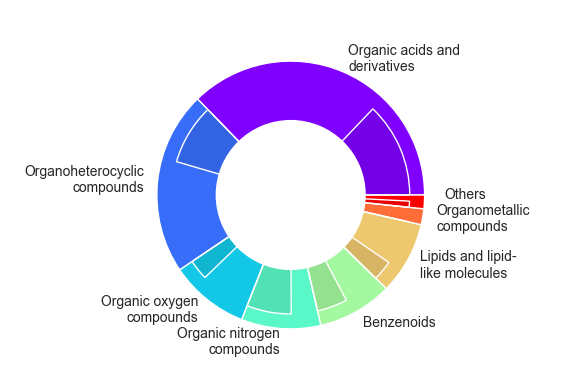

In [193]:
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap
fig, ax = plt.subplots(figsize = (6, 4))
ax.axis('equal')
width = 0.5
labels = ast_value_counts['unique_values'][0:7].tolist()
labels.append('Others')
# Outer ring
cm = plt.get_cmap("rainbow")
cout = list(cm(np.linspace(0,1,len(labels))))


# pie[2].set_visible(False)
# Inner ring
cin = []
for i in range(0, len(cout)):
    color_temp = cout[i].copy()
    color_temp[0]=color_temp[0]*0.1
    color_temp[1]=color_temp[1]*0.1
    color_temp[2]=color_temp[2]*0.1
    color_temp[3]=color_temp[3]*0.1
    cin.append(color_temp)
    cin.append(color_temp)
# labels = list(map("".join, zip(list("aabbcc"),map(str, [1,2]*3))))
# wrapped = [ label.replace(' ', '\n') for label in labels ]
wrapped =[ '\n'.join(wrap(l, 20)) for l in labels ]
pie, _ = ax.pie(ast_count, radius=0.9, labels=wrapped, colors=cout,labeldistance=1.1, )
print(_[-1])
_[-1].set_position((1.0336201505647833, -0))
pie2, _ = ax.pie(exp_count_in, radius=0.8,
                 colors=cin)
plt.setp(pie, width=width, edgecolor='white')


pie3, _ = ax.pie([365], radius=0.5, colors = 'white')
# pie3, _ = ax.pie(1, radius=width,
#                  labeldistance=0.7, colors=cout)
for i in range(0, len(exp_count_in)):
    if i%2==1:
        pie2[i].set_visible(False)
# plt.setp(pie2, width=width, edgecolor='white')
# plt.show()
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'sunburst.png'), facecolor = 'white')




# generating head_to_tail figures for publications

In [19]:
import plotly.graph_objects as go

In [112]:
fig_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/denoising_data/figures'

N-(4-Chlorophenyl)-3-phenylpropanamide
entropy similarity is 0.8929709792137146
entropy similarity is 0.933868944644928


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

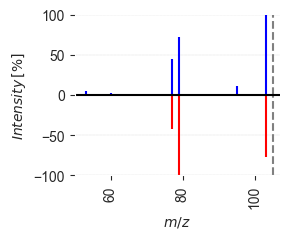

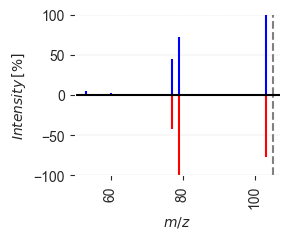

In [119]:
row = ast_top_hit_l1.loc[91]
print(row['Name'])
msms_raw = astral_pos.iloc[row['label']]['spectrum']
cu.everything_to_image(row['SMILES'], savepath=os.path.join(fig_dir, 'selected_mol_'+row['Name']+'.png'))
plotter.head_to_tail_plot(msms_raw, row['spectrum'], pmz = row['PrecursorMZ'],mz_start=50, mz_end=row['PrecursorMZ']+2,
                          savepath=os.path.join(fig_dir, 'selected_raw_'+row['Name']+'.png'), publication=True)
plotter.head_to_tail_plot(row['msms_denoised'], row['spectrum'], pmz = row['PrecursorMZ'],mz_start=50, mz_end=row['PrecursorMZ']+2,
                          savepath=os.path.join(fig_dir, 'selected_denoised_'+row['Name']+'.png'), publication=True)

1-(2-Bromophenyl)hydrazine
entropy similarity is 0.6561129093170166
entropy similarity is 0.7524522542953491


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

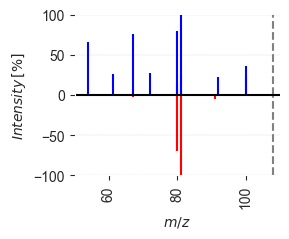

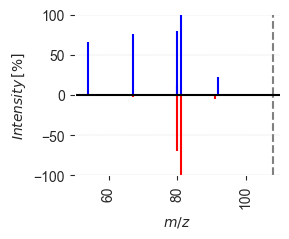

In [118]:
row = ast_top_hit_l1_halo.loc[4148]
print(row['Name'])
msms_raw = astral_pos.iloc[row['label']]['spectrum']
cu.everything_to_image(row['SMILES'], savepath=os.path.join(fig_dir, 'selected_mol_'+row['Name']+'.png'))
plotter.head_to_tail_plot(msms_raw, row['spectrum'], pmz = row['PrecursorMZ'],mz_start=50, mz_end=row['PrecursorMZ']+2,
                          savepath=os.path.join(fig_dir, 'selected_raw_'+row['Name']+'.png'), publication=True)
plotter.head_to_tail_plot(row['msms_denoised'], row['spectrum'], pmz = row['PrecursorMZ'],mz_start=50, mz_end=row['PrecursorMZ']+2,
                          savepath=os.path.join(fig_dir, 'selected_denoised_'+row['Name']+'.png'), publication=True)

2-Amino-N-cyclohexylethanesulfonamide
entropy similarity is 0.5685136318206787
entropy similarity is 0.8082950711250305


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

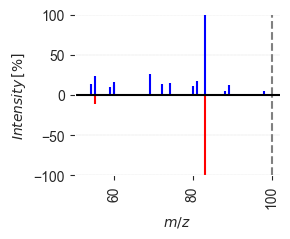

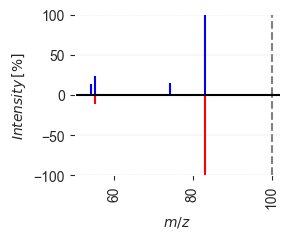

In [117]:
row = ast_top_hit_l1_halo.loc[435]
print(row['Name'])
msms_raw = astral_pos.iloc[row['label']]['spectrum']
cu.everything_to_image(row['SMILES'], savepath=os.path.join(fig_dir, 'selected_mol_'+row['Name']+'.png'))
plotter.head_to_tail_plot(msms_raw, row['spectrum'], pmz = row['PrecursorMZ'],mz_start=50, mz_end=row['PrecursorMZ']+2,
                          savepath=os.path.join(fig_dir, 'selected_raw_'+row['Name']+'.png'), publication=True)
plotter.head_to_tail_plot(row['msms_denoised'], row['spectrum'], pmz = row['PrecursorMZ'],mz_start=50, mz_end=row['PrecursorMZ']+2,
                          savepath=os.path.join(fig_dir, 'selected_denoised_'+row['Name']+'.png'), publication=True)

(5E)-3-Butyl-5-(1-methylpyridin-2(1H)-ylidene)-2-thioxo-1,3-thiazolidin-4-one
entropy similarity is 0.6152716279029846
entropy similarity is 1.0


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

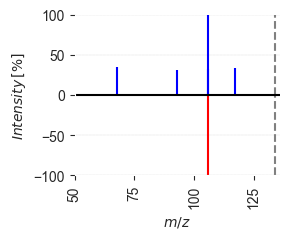

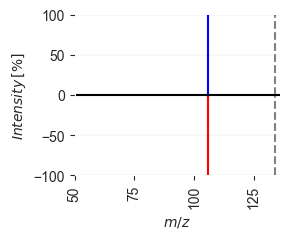

In [116]:
row = ast_top_hit_l1.loc[692]
print(row['Name'])
msms_raw = astral_pos.iloc[row['label']]['spectrum']
cu.everything_to_image(row['SMILES'], savepath=os.path.join(fig_dir, 'selected_mol_'+row['Name']+'.png'))
plotter.head_to_tail_plot(msms_raw, row['spectrum'], pmz = row['PrecursorMZ'],mz_start=50, mz_end=row['PrecursorMZ']+2,
                          savepath=os.path.join(fig_dir, 'selected_raw_'+row['Name']+'.png'), publication=True)
plotter.head_to_tail_plot(row['msms_denoised'], row['spectrum'], pmz = row['PrecursorMZ'],mz_start=50, mz_end=row['PrecursorMZ']+2,
                          savepath=os.path.join(fig_dir, 'selected_denoised_'+row['Name']+'.png'), publication=True)

threo-Dihydrobupropion
entropy similarity is 0.6903249025344849
entropy similarity is 0.8780378103256226


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

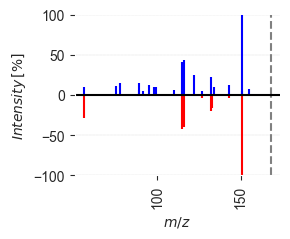

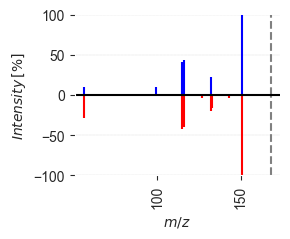

In [113]:
row = ast_top_hit_l1.loc[1527]
print(row['Name'])
msms_raw = astral_pos.iloc[row['label']]['spectrum']
cu.everything_to_image(row['SMILES'], savepath=os.path.join(fig_dir, 'selected_mol_'+row['Name']+'.png'))
plotter.head_to_tail_plot(msms_raw, row['spectrum'], pmz = row['PrecursorMZ'],
                          savepath=os.path.join(fig_dir, 'selected_raw_'+row['Name']+'.png'), publication=True)
plotter.head_to_tail_plot(row['msms_denoised'], row['spectrum'], pmz = row['PrecursorMZ'],
                          savepath=os.path.join(fig_dir, 'selected_denoised_'+row['Name']+'.png'), publication=True)

In [6]:
fig_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/denoising_data/figures'
ast_top_hit_l1 = read_df(os.path.join('/Users/fanzhoukong/Documents/GitHub/Libgen_data/Astral', 'ast_top_hit_l1.csv'))

done read in df


In [4]:
# top_hit_l1_mapped = top_hast_top_hit_l1it_l1[top_hit_l1['entropy_offset']>-0.05]


In [4]:
n_anno = [224, 273, 359, 520]
labels = ['Entropy search - Exploris 240', 'Denoising search - Exploris 240','Entropy search - Astral', 'Denoising search - Astral']

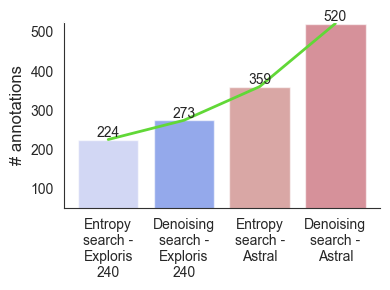

In [8]:
fig=plt.figure(figsize=(4,3))
ax1 = fig.add_subplot()
colors = ['#AAB6F7','#3564F7', '#CE5F5A','#CE3549']
sns.barplot(x = labels, y = n_anno, ax = ax1, alpha = 0.6, palette = colors, )
ax1.bar_label(ax1.containers[0])
sns.lineplot(x = labels, y = n_anno, ax = ax1, color = '#61D837',linewidth = 2)
wrap_labels(ax1, 10)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_ylim(50, 525)
ax1.set_facecolor("white")
# plt.legend()
plt.ylabel('# annotations', size = 12)
# plt.xlabel('')
fig.tight_layout()
ax1.spines['left'].set_color('#313131')
ax1.spines['bottom'].set_color('#313131')
plt.savefig(os.path.join(fig_dir, 'n_annotation_astral.png'))

In [11]:
mapped = ast_top_hit_l1[ast_top_hit_l1['entropy_raw']>0.5]

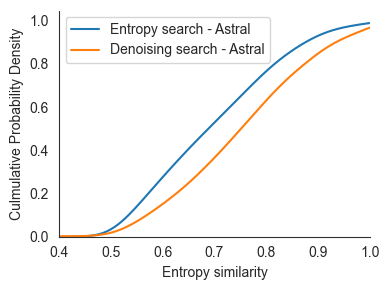

In [14]:
fig=plt.figure(figsize=(4,3))
ax1 = fig.add_subplot()
sns.kdeplot(mapped['entropy_raw'], label = 'Entropy search - Astral', cumulative = True)

sns.kdeplot(mapped['entropy_denoised'], label = 'Denoising search - Astral', cumulative = True)
# sns.kdeplot(top_hit_l2['entropy_l2'], label = 'l2', cumulative=True)
plt.legend(facecolor = 'white')
plt.grid(False)
ax1.set_facecolor("white")
plt.xlim(0.4,1)
plt.ylabel('Culmulative Probability Density', size = 10)
plt.xlabel('Entropy similarity', size = 10)
# plt.xlabel('')

fig.tight_layout()
ax1.spines['left'].set_color('#313131')
ax1.spines['bottom'].set_color('#313131')
# plt.savefig(os.path.join(fig_dir, 'cdf_astral.png'))
plt.savefig(os.path.join('/Users/fanzhoukong/Documents/GitHub/Libgen_data/Astral','cdf_astral.png'))